## Final Project Submission

Please fill out:
* Student name: Deztany Jackson
* Student pace: self paced 
* Scheduled project review date/time: June 22, 2022
* Instructor name: Claude Fried
* Blog post URL: http://dmvinedata.com/blog/



## Microsoft Movie Studio Analysis

#### Authors: Deztany Jackson

## Overview 

This analysis directs Microsoft's potential studio head with actional insights on their path forward into developing a movie studio. These recommendations are determined from insights from box office movie "Ratings" and depends on other attributes such as "Genre", "Directors" and "Movie Budget". The datasets given were filtered to analyse movies and their associated  with a minimum of a  "8/10" ("B") rating. The analysis goal was to extract patterns from some of the "best" movies.

#RESULTS
#RECOMMENDATIONS




## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Microsft is in competition with current major studios which have been in business for many years and already have a wealth of experience. The questions driving the analysis, support  Microsoft making choices based on direct data output from their  competition as well as  potential growth areas that may be overlooked. The analysis questions and main variable of success were chosen with the mindset, Microsoft is a major tech company that has influence and skillsets in other areas of tech. 

#They have areas other usecases that can exploit findings"Ratings" are the mainThe potential growth areas are asked with the context of knowing Microsoft's technical coverage that can exploi a  a wealth of experienc

Ref: [Phase 1 Project Description](https://learning.flatironschool.com/courses/4963/pages/phase-1-project-description?module_item_id=370765), 2022

## Data Understanding

Box office related datasets (SQL and CSV) with the box office movie target "Rating" variable and associated independent  "Genre, Director and Budget" variable information  were taken from [IMBD](https://www.imdb.com/) and [the-numbers](https://www.the-numbers.com/). 

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Allows querying of dataframe with SQL
import pandasql as sqldf


In [3]:
#Lambda function to query datafram with SQL
pysqldf = lambda q: sqldf(q, globals())

In [4]:
#Connecting with databases
conn = sqlite3.connect('im.db')


In [58]:
#View the list of tables in the "IMDB" database

df = pd.read_sql("""
SELECT name
FROM sqlite_master 
WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,new_directors
9,new_1



### IMBD Tables Used:

#### - movie_basics
    - The movie_basics dataset describes just over 146,000 movies with their associated genres, years.
#### - movie_ratings
    - The movie_ratings dataset describes 73,856 movie'saverage rating (from average ratings that range from "1" to "10") and the number of votes the average is calculated (ranging from "5" to "1.84 Mil"). 
#### - directors
     - The directors dataset describes 291,174 movies and their associated director's id.
 
#### - persons
    - The persons dataset describes 606,648 people and their associated movie related profession(s). 

#### IMBD Table: movie_basics

In [6]:
#Looking at movie_basic table
q_basics = '''
SELECT
    *
FROM movie_basics;
'''
MovBasics_df = pd.read_sql(q_basics, conn)
#What does the dataset include?
MovBasics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
MovBasics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
MovBasics_df["genres"].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [9]:
MovBasics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [10]:
#Looking to see if there are any duplicates
q_basics = '''
SELECT
    movie_id,
    start_year,
    primary_title,
    genres,
    COUNT(*) AS CNT
FROM movie_basics
GROUP BY movie_id
HAVING COUNT(*) > 1
ORDER BY movie_id;
'''

MovBasics_df = pd.read_sql(q_basics, conn)
#Displays if there are duplicate movies
MovBasics_df

,movie_id,start_year,primary_title,genres,CNT


#### IMBD Table: movie_ratings

In [11]:
#Looking at movie_ratings table
q_basics = '''
SELECT
    *
FROM movie_ratings;'''

MovRatings_df = pd.read_sql(q_basics, conn)
MovRatings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
MovRatings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
MovRatings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [14]:
MovRatings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

#### IMBD Table: directors

In [51]:
#Looking at directors table
q_basics = '''
SELECT
    *
FROM directors;'''

MovDirID_df = pd.read_sql(q_basics, conn)
MovDirID_df.head(10)
#Multiple duplicates are found and need to be removed

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
6,tt0878654,nm2292011
7,tt0879859,nm2416460
8,tt0996958,nm2286991
9,tt0996958,nm2286991


In [16]:
MovDirID_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [17]:
MovDirID_df.describe()

,movie_id,person_id
count,291174,291174
unique,140417,109253
top,tt4050462,nm6935209
freq,3818,238


In [18]:
MovDirID_df.isna().sum()

movie_id     0
person_id    0
dtype: int64

#### IMBD Table: persons

In [19]:
#Looking at persons table
q_basics = '''
SELECT
    *
FROM persons;'''

MovDir_df = pd.read_sql(q_basics, conn)
MovDir_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [20]:
MovDir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [21]:
MovDir_df["primary_name"].isna().sum()

0

#### Budget CSV: movie_budgets
    - This dataset describes the budget and gross from 5782 movies. The movie name values are the only link to joining the these values with other movie datasets.

In [22]:
#Import CSV to a dataframe
Bud_df = pd.read_csv('movie_budgets.csv')
Bud_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
#Note that the production_budget is a string and not a number
Bud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation
Describe and justify the process for preparing the data for analysis.

### Data Cleaning

#### movie_basic, movie_ratings, directors, persons

###  Data Merge and Clean:                                        
movie_basic and movie_ratings 

In [24]:
#Joining movie_basics and ratings
qB1 = """
SELECT
    movie_id,
    start_year,
    primary_title,
    genres,
    averagerating,
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
GROUP BY movie_id
ORDER BY numvotes DESC, averagerating
;
"""
Genre_Ratings= pd.read_sql(qB1,conn)

In [25]:
movieG_df = pd.DataFrame(Genre_Ratings)
movieG_df.head()

,movie_id,start_year,primary_title,genres,averagerating,numvotes
0,tt1375666,2010,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,2012,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,tt0816692,2014,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,2012,Django Unchained,"Drama,Western",8.4,1211405
4,tt0848228,2012,The Avengers,"Action,Adventure,Sci-Fi",8.1,1183655


[Ref: Split Values on Rows on Stackoverflow ](https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows)

In [26]:
#Spliting the genres into sep rows by ","
s = movieG_df["genres"].str.split(",").apply(pd.Series, 1, dtype = pd.StringDtype()).stack()
s.index = s.index.droplevel(-1) # align index
s.name = "genres" #name to join on
s

0             Action
0          Adventure
0             Sci-Fi
1             Action
1           Thriller
            ...     
73851          Drama
73852    Documentary
73853    Documentary
73854    Documentary
73855    Documentary
Name: genres, Length: 128490, dtype: object

In [27]:
#delete old dataframe column with multiple values
del movieG_df["genres"]



In [28]:
#making it equal to the new dataframe
movieG1_df = movieG_df.join(s)
movieG1_df.head()

,movie_id,start_year,primary_title,averagerating,numvotes,genres
0,tt1375666,2010,Inception,8.8,1841066,Action
0,tt1375666,2010,Inception,8.8,1841066,Adventure
0,tt1375666,2010,Inception,8.8,1841066,Sci-Fi
1,tt1345836,2012,The Dark Knight Rises,8.4,1387769,Action
1,tt1345836,2012,The Dark Knight Rises,8.4,1387769,Thriller


#### Missing Values
Drop missing values from dataframe.

Depending on the amount of missing data I will drop the missing rows or fill in.  If there is a negligent amount compared to the entire dataset, I will choose to drop the values.

In [29]:
#Determine if there are missing data 
movieG1_df["genres"].isna().sum()

804

In [30]:
#Checking to see if any ratings values have missing data
movieG_df["averagerating"].isna().sum()

0

In [31]:
#drop missing values 
movieG1_df = movieG1_df.dropna()

Check similar genre values to see if any  could be merged.

In [32]:
movieG1_df["genres"].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Western',
       'Biography', 'Crime', 'Mystery', 'Comedy', 'Fantasy', 'Family',
       'Animation', 'Romance', 'Music', 'History', 'Horror', 'Sport',
       'War', 'Musical', 'Documentary', 'News', 'Game-Show', 'Reality-TV',
       'Adult', 'Short'], dtype=object)

In [33]:
#Checking genres values movies to see if they are compatible to be merged
genCat = movieG1_df.loc[(movieG1_df["genres"] == "Music") | (movieG1_df["genres"] == "Musical")]
genCat.head(50)

,movie_id,start_year,primary_title,averagerating,numvotes,genres
33,tt2582802,2014,Whiplash,8.5,616916,Music
88,tt3783958,2016,La La Land,8.0,436070,Music
141,tt1727824,2018,Bohemian Rhapsody,8.0,345466,Music
184,tt1707386,2012,Les Misérables,7.6,285971,Musical
209,tt1981677,2012,Pitch Perfect,7.2,256565,Music
218,tt1517451,2018,A Star Is Born,7.8,249245,Music
230,tt2771200,2017,Beauty and the Beast,7.2,238325,Musical
307,tt1485796,2017,The Greatest Showman,7.6,199663,Musical
390,tt1226229,2010,Get Him to the Greek,6.4,161653,Music
473,tt2848292,2015,Pitch Perfect 2,6.4,130692,Music


In [34]:
# Rename values in genre to match
movieG1_df["genres"].replace("Musical","Music", inplace = True)
                      

Checking the statistical measures of the number of votes. I want to consider the average ratings that were made from a certain amount of votes. The mean number will be considered. 

In [35]:
#Check the mean amount of votes given. 
movieG1_df.describe()



,start_year,averagerating,numvotes
count,128490.000000,128490.000000,1.284900e+05
mean,2014.221021,6.302146,5.337769e+03
std,2.579176,1.457744,3.808942e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.400000,1.600000e+01
50%,2014.000000,6.400000,6.600000e+01
75%,2016.000000,7.300000,4.290000e+02
max,2019.000000,10.000000,1.841066e+06


### Filter Ratings

Filter table by an averagerating with a minimum value of "8" and with a minimum numvotes with a minimum value of the mean (5337). Rationale:  The analysis goal was to extract patterns from some of the "best" movies. An 8/10 rating is equivalent to a "B" rating. Using the mean numvotes filters out a lot of lower outliers where a low number of votes produced high ratings. This allows the ratings used to be more credible.    

In [36]:
#Filters future dataset for a certain averagerating and numvote values
g = movieG1_df.loc[(movieG1_df["averagerating"] >=8) & (movieG1_df["numvotes"] > movieG1_df["numvotes"].mean())]
g.head(25)

,movie_id,start_year,primary_title,averagerating,numvotes,genres
0,tt1375666,2010,Inception,8.8,1841066,Action
0,tt1375666,2010,Inception,8.8,1841066,Adventure
0,tt1375666,2010,Inception,8.8,1841066,Sci-Fi
1,tt1345836,2012,The Dark Knight Rises,8.4,1387769,Action
1,tt1345836,2012,The Dark Knight Rises,8.4,1387769,Thriller
2,tt0816692,2014,Interstellar,8.6,1299334,Adventure
2,tt0816692,2014,Interstellar,8.6,1299334,Drama
2,tt0816692,2014,Interstellar,8.6,1299334,Sci-Fi
3,tt1853728,2012,Django Unchained,8.4,1211405,Drama
3,tt1853728,2012,Django Unchained,8.4,1211405,Western


In [37]:
#View filtered data statisics with 
g.describe()

,start_year,averagerating,numvotes
count,522.000000,522.000000,5.220000e+02
mean,2014.348659,8.251533,1.818726e+05
std,2.487027,0.285624,3.110069e+05
min,2010.000000,8.000000,5.406000e+03
25%,2013.000000,8.100000,9.988000e+03
50%,2014.000000,8.200000,2.937300e+04
75%,2016.000000,8.300000,1.816010e+05
max,2019.000000,9.700000,1.841066e+06


### Remove Duplicates from Directors

In [38]:
#Database querying through SQL
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
#Checking Duplicates in directors table
q = """

SELECT
*,
COUNT (*) AS CNT
FROM new_directors
GROUP BY movie_id, person_id
HAVING CNT >1;
"""

Dir_Dup = pd.read_sql(q,conn)
Dir_Dup

In [41]:

#Ref : https://www.youtube.com/watch?v=w9dwX7xsBgY By Database Star
#SQL Remove Duplicate Rows: A How-to-Guide
q = """
CREATE TABLE new_directors AS 
SELECT (DISTINCT movie_id, person_id)
FROM directors
GROUP BY movie_id, person_id ;
"""
New_Dir = pd.read_sql(q,conn)
New_Dir

DatabaseError: Execution failed on sql '
CREATE TABLE new_a AS 
SELECT (DISTINCT movie_id, person_id)
FROM directors
GROUP BY movie_id, person_id ;
': table new_a already exists

In [47]:
#Checking Duplicates in new table
q = """

SELECT
*,
COUNT (*) AS CNT
FROM new_directors
GROUP BY movie_id, person_id
HAVING CNT >1;
"""

newD_Dup = pd.read_sql(q,conn)
newD_Dup

,movie_id,person_id
0,tt0063540,nm0712540
1,tt0066787,nm0002411
2,tt0069049,nm0000080
3,tt0069204,nm0611531
4,tt0100275,nm0749914
...,...,...
163530,tt9916622,nm9272491
163531,tt9916706,nm7764440
163532,tt9916730,nm10538612
163533,tt9916754,nm8349149


In [59]:
#Drop directors table
#Fix Cod
q = """
DROP directors, new_a, new_1;"""
Del_Table = pd.read_sql(q,conn)
Del_Table

DatabaseError: Execution failed on sql '
DROP directors, new_a, new_1;': near "directors": syntax error

### Feature Engineering


### Genres

What are the top rated genres by?

    -Consider the the number of votes to determine he average.
What is the number of movies does each genre contain.


In [60]:
#Count the number of movies each genre has with min a rating of "8" and min 5337 votes.

#Look at genres with high ratings and a large amount of votes - subjective but insightful
#Look at genres with not a lot of movies for potentia cases
mC ="""
SELECT
    genres,
    COUNT (movie_id) AS MCNT,
    averagerating,
    numvotes
FROM g
GROUP BY genres
ORDER BY  MCNT DESC;
"""
MovieCount = pysqldf(mC)
MovieCount

,genres,MCNT,averagerating,numvotes
0,Drama,124,8.6,1299334
1,Action,52,8.8,1841066
2,Documentary,44,8.3,65304
3,Crime,43,8.2,1035358
4,Comedy,37,8.1,948394
5,Thriller,36,8.4,1387769
6,Biography,34,8.2,1035358
7,Adventure,33,8.8,1841066
8,Animation,19,8.3,682218
9,Mystery,17,8.1,1005960


## Director Questions: 
    -How many different type of genres does each director have? 
    -How many movies does each director have (with preconditions) 
    -Which directors does each genre have?
    -Who are the top 10 directors that have more than 2 movies with top rated rnges

### Director Features

In [62]:
#Joining of several tables to get movie id and their director

qD = """
SELECT
    movie_id,
    primary_name AS Director
FROM movie_basics 
JOIN movie_ratings
    USING (movie_id)
JOIN new_directors
    USING (movie_id)
JOIN persons
    USING(person_id);
"""
Dir_Sql = pd.read_sql(qD,conn)

movieD2_df = pd.DataFrame(Dir_Sql)
movieD2_df

,movie_id,Director
0,tt0063540,Harnam Singh Rawail
1,tt0066787,Mani Kaul
2,tt0069049,Orson Welles
3,tt0069204,Hrishikesh Mukherjee
4,tt0100275,Raoul Ruiz
...,...,...
86025,tt9913084,Giancarlo Soldi
86026,tt9914286,Ahmet Faik Akinci
86027,tt9914642,Chris Jordan
86028,tt9914942,Laura Jou


The filtered (averagerating and numvotes) dataframe "g" will be used throughout the queries

In [ ]:
#Number of Directors in each genre (Using a filter)
q = """SELECT  
   genres,
   COUNT (Director) AS DirCount
FROM g
JOIN movieD2_df
    USING (movie_id)
GROUP BY genres
ORDER BY DirCount DESC;
"""
Gen_Dir_Count = pysqldf(q)
Gen_Dir_Count

In [ ]:
#How many movies does each director have? 
q = """
SELECT 
    director,
    COUNT ( DISTINCT movie_id) AS Movie_Count,
    COUNT (DISTINCT  genres) AS Genre_Count
FROM g
JOIN movieD2_df
    USING (movie_id)   
GROUP BY director
ORDER BY Movie_Count DESC;
"""

Dir_Mov_Gen_Count = pysqldf(q)
Dir_Mov_Gen_Count

In [113]:
#Which genres does each director have (for directors with more than 1 movie)
q = """
SELECT 
    director,
    genres
FROM g
JOIN movieD2_df
    USING (movie_id)
GROUP BY director, genres
HAVING COUNT ( DISTINCT movie_id) > 1
ORDER BY genres;
"""

Dir_Gen = pysqldf(q)
Dir_Gen

,Director,genres
0,Anthony Russo,Action
1,Christopher Nolan,Action
2,Joe Russo,Action
3,S.S. Rajamouli,Action
4,Sukumar,Action
5,Anthony Russo,Adventure
6,Christopher Nolan,Adventure
7,Dragan Bjelogrlic,Adventure
8,Joe Russo,Adventure
9,Lee Unkrich,Adventure


### Analysis

## Data Modeling

## Write How did you analyze or model the data?
How did you iterate on your initial approach to make it better?
Why are these choices appropriate given the data and the business problem?

In [ ]:
#Create Plot
fig, genre_rating_ax = plt.subplots(ncols = 1, nrows = 1, figsize=(30, 30))

g.plot.scatter(x = "genres", y = "numvotes", c = "averagerating", fontsize = 12,  s = 100,  colormap = "rainbow",   ax= genre_rating_ax )
genre_rating_ax .set_yscale('log', subs = [2,3,4,5,6,8])

x = np.arange(10000, 1900000, 100000)
genre_rating_ax.set_yticks(x)

#Set titles
genre_rating_ax.set_title('Distribution of averagerating for genres', fontsize=30)
genre_rating_ax.set_ylabel('Number of Rating Votes', fontsize=20)
genre_rating_ax.set_xlabel('Movie Genres', fontsize=20)

#Save image in folder
fig.savefig("genre_ratings.png", dpi=150)
#plt.show()


### Director

In [121]:
#Table for plotting Top Directs more than 2 movies and genre by ratings
#Consider the numvotes value when choosing and analyzing data

q = """
SELECT 
    director,
    genres,
    ROUND (AVG(numvotes), 0) as Avg_Votes,
    ROUND (AVG(averagerating), 1) as Avg_Rating,
    COUNT ( DISTINCT movie_id ) AS MCNT
    
FROM g
JOIN movieD2_df 
    USING (movie_id)
GROUP BY director, genres
HAVING MCNT > 1
ORDER BY Avg_Votes DESC;
"""

Dir_Plot_df = pysqldf(q)
Dir_Plot_df

,Director,genres,Avg_Votes,Avg_Rating,MCNT
0,Christopher Nolan,Action,1614418.0,8.6,2
1,Christopher Nolan,Adventure,1570200.0,8.7,2
2,Christopher Nolan,Sci-Fi,1570200.0,8.7,2
3,Quentin Tarantino,Drama,608503.0,9.1,2
4,Anthony Russo,Action,556031.0,8.7,2
5,Anthony Russo,Adventure,556031.0,8.7,2
6,Anthony Russo,Sci-Fi,556031.0,8.7,2
7,Joe Russo,Action,556031.0,8.7,2
8,Joe Russo,Adventure,556031.0,8.7,2
9,Joe Russo,Sci-Fi,556031.0,8.7,2


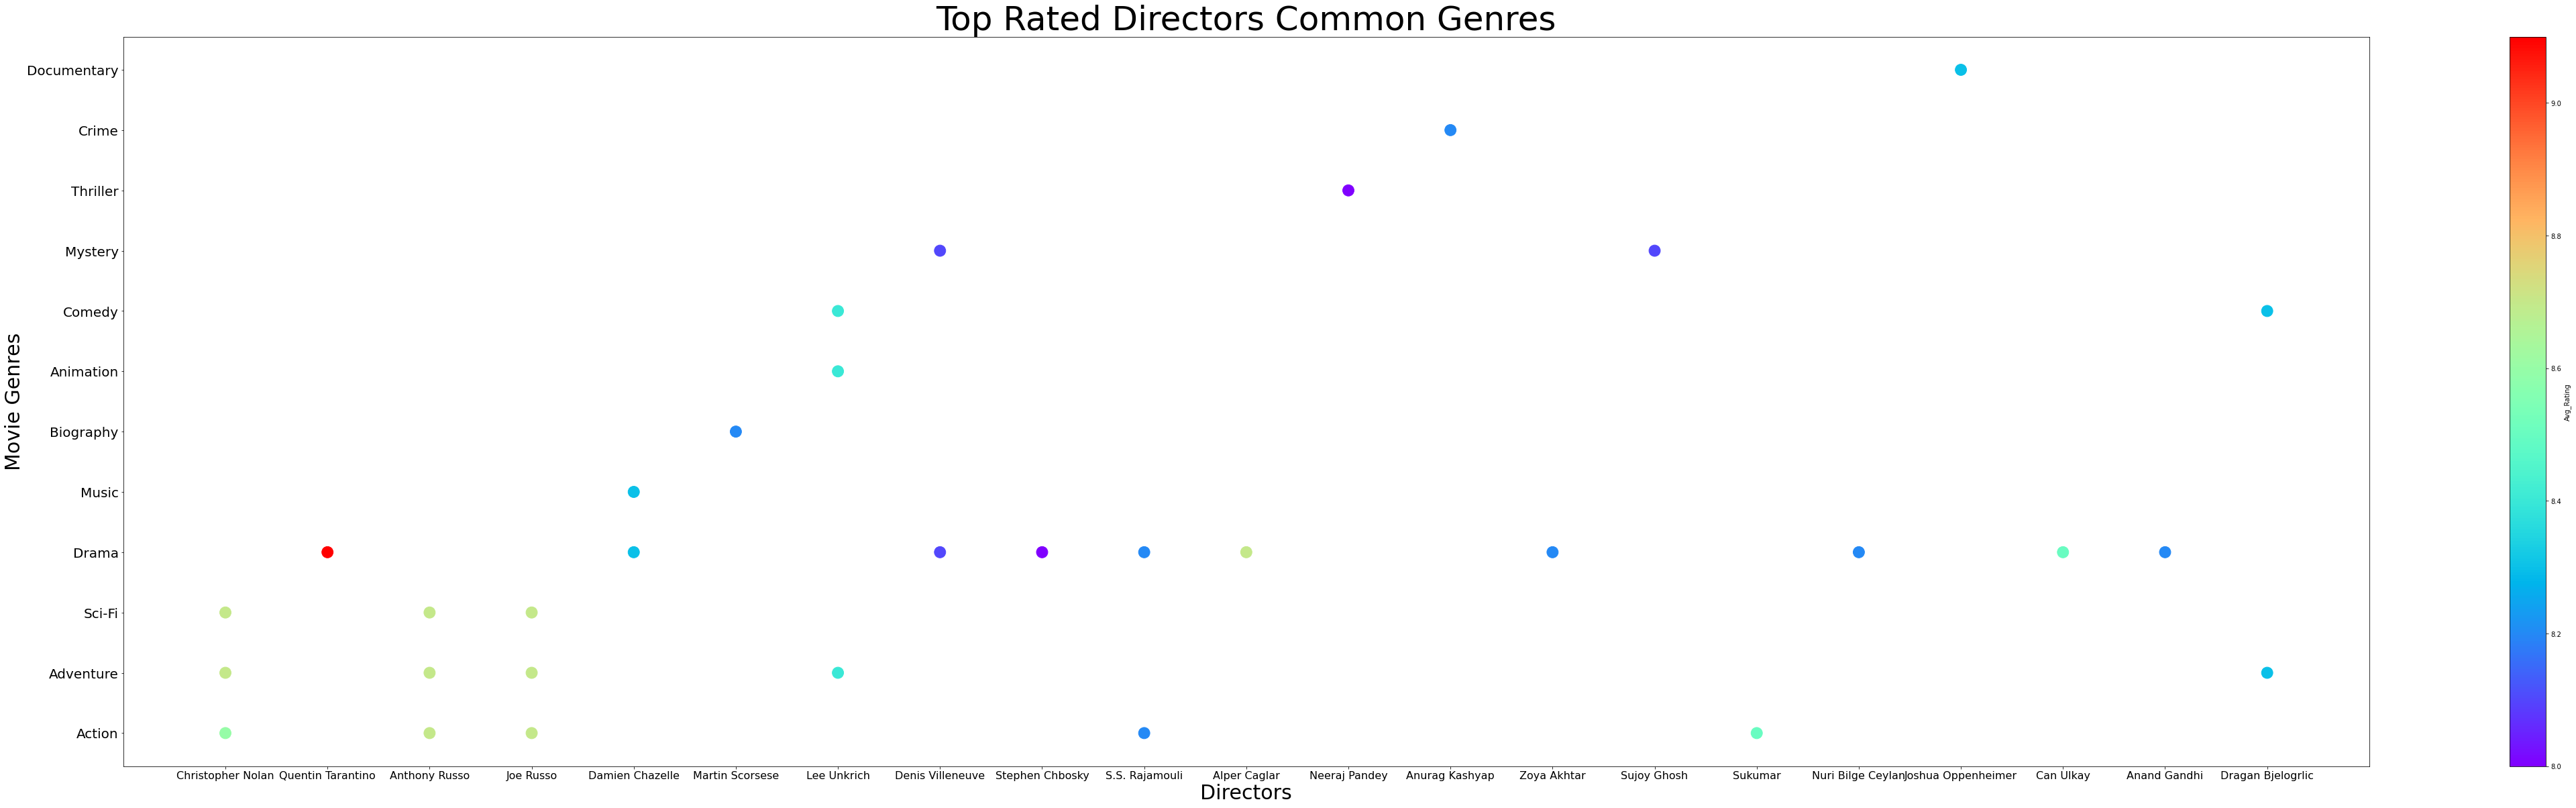

In [124]:
#Create Plot
fig, genreDir_rating_ax = plt.subplots(ncols = 1, nrows = 1, figsize=(75, 20))

Dir_Plot_df.plot.scatter(x = "Director", y = "genres", c = "Avg_Rating" ,  s = 285,  colormap = "rainbow",   ax= genreDir_rating_ax )



#Set titles
genreDir_rating_ax.set_title('Top Rated Directors Common Genres', fontsize=50)
genreDir_rating_ax.set_ylabel('Movie Genres', fontsize=30)
genreDir_rating_ax.set_xlabel('Directors', fontsize=30)

genreDir_rating_ax.tick_params(axis='x', labelsize=16)
genreDir_rating_ax.tick_params(axis='y', labelsize=20)

#Save image in folder
fig.savefig("genre_ratings.png", dpi=150)
#plt.show()


### Movie Direct - Prep Merge


# Director Visual

# Look at Budget- state limitations
# Use

In [127]:
#599 Rows
q = """
SELECT 
   averagerating,
   numvotes,
   movie_id,
   genres,
   Director,
   primary_title
FROM g
JOIN movieD2_df
    USING (movie_id)



;

"""

BudMovie = pysqldf(q)
BudMovie

,averagerating,numvotes,movie_id,genres,Director,primary_title
0,8.8,1841066,tt1375666,Action,Christopher Nolan,Inception
1,8.8,1841066,tt1375666,Adventure,Christopher Nolan,Inception
2,8.8,1841066,tt1375666,Sci-Fi,Christopher Nolan,Inception
3,8.4,1387769,tt1345836,Action,Christopher Nolan,The Dark Knight Rises
4,8.4,1387769,tt1345836,Thriller,Christopher Nolan,The Dark Knight Rises
...,...,...,...,...,...,...
594,8.1,5406,tt1572781,Animation,Yasuhiro Takemoto,The Disappearance of Haruhi Suzumiya
595,8.1,5406,tt1572781,Comedy,Tatsuya Ishihara,The Disappearance of Haruhi Suzumiya
596,8.1,5406,tt1572781,Comedy,Yasuhiro Takemoto,The Disappearance of Haruhi Suzumiya
597,8.1,5406,tt1572781,Drama,Tatsuya Ishihara,The Disappearance of Haruhi Suzumiya


In [128]:
#Import Budget CSV in
Bud_df = pd.read_csv('movie_budgets.csv')
Bud_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
#Remove necessary characters from string
Bud_df["production_budget"]=Bud_df["production_budget"].str.strip("&")
Bud_df["production_budget"]=Bud_df["production_budget"].str.replace(",", "")

In [ ]:

#Convert Budget from string to int necessary
Bud_df["production_budget"]=Bud_df["production_budget"].astype(int) 
Bud_df.describe()

In [132]:
#Joining by names narrowed the list to 173 entries
q = """
SELECT
*
FROM BudMovie AS bm
JOIN Bud_df bd
    ON bm.primary_title = bd.movie
;

"""
bud_join= pysqldf(q)
bud_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   averagerating      173 non-null    float64
 1   numvotes           173 non-null    int64  
 2   movie_id           173 non-null    object 
 3   genres             173 non-null    object 
 4   Director           173 non-null    object 
 5   primary_title      173 non-null    object 
 6   id                 173 non-null    int64  
 7   release_date       173 non-null    object 
 8   movie              173 non-null    object 
 9   production_budget  173 non-null    object 
 10  domestic_gross     173 non-null    object 
 11  worldwide_gross    173 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 16.3+ KB


In [133]:
#Refine the joined budget list.  
#Look to see if the top genres are top and if the same directors for the same movies are still good
q ="""
SELECT
    movie_id,
    movie,
    Director,
    genres,
    averagerating,
    numvotes,
    production_budget AS pbud
FROM bud_join
ORDER BY pbud DESC
;

"""
budget_df= pysqldf(q)
budget_df

,movie_id,movie,Director,genres,averagerating,numvotes,pbud
0,tt5074352,Dangal,Nitesh Tiwari,Action,8.5,123638,"$9,500,000"
1,tt5074352,Dangal,Nitesh Tiwari,Biography,8.5,123638,"$9,500,000"
2,tt5074352,Dangal,Nitesh Tiwari,Drama,8.5,123638,"$9,500,000"
3,tt1130884,Shutter Island,Martin Scorsese,Mystery,8.1,1005960,"$80,000,000"
4,tt1130884,Shutter Island,Martin Scorsese,Thriller,8.1,1005960,"$80,000,000"
...,...,...,...,...,...,...,...
168,tt2375605,The Act of Killing,Christine Cynn,Crime,8.2,31115,"$1,000,000"
169,tt2375605,The Act of Killing,Joshua Oppenheimer,Crime,8.2,31115,"$1,000,000"
170,tt2375605,The Act of Killing,Anonymous,Documentary,8.2,31115,"$1,000,000"
171,tt2375605,The Act of Killing,Christine Cynn,Documentary,8.2,31115,"$1,000,000"


In [ ]:
#Formatting Budget https://www.markhneedham.com/blog/2021/04/11/pandas-format-dataframe-numbers-commas-decimals/
#budget_df = budget_df.style.format({
    "pbud": "{:,d}",})


In [ ]:
budget_df.info()




In [134]:
#Look at average budget for genres

q ="""
SELECT
    movie_id,
    movie,
    Director,
    genres,
    averagerating,
    ROUND (AVG(numvotes), 0) as Avg_Votes,
    pbud,
    ROUND (AVG(pbud), 0) as Avg_Bud
FROM budget_df
GROUP BY genres
ORDER BY Avg_Bud DESC, Avg_Votes DESC
;
"""
budA_df= pysqldf(q)
budA_df

,movie_id,movie,Director,genres,averagerating,Avg_Votes,pbud,Avg_Bud
0,tt1853728,Django Unchained,Quentin Tarantino,Western,8.4,1211405.0,"$100,000,000",0.0
1,tt0848228,The Avengers,Joss Whedon,Sci-Fi,8.1,861201.0,"$60,000,000",0.0
2,tt1130884,Shutter Island,Martin Scorsese,Thriller,8.1,790300.0,"$80,000,000",0.0
3,tt7961060,Dragon Ball Super: Broly,Tatsuya Nagamine,Adventure,8.0,641799.0,"$8,500,000",0.0
4,tt5074352,Dangal,Nitesh Tiwari,Action,8.5,604645.0,"$9,500,000",0.0
5,tt1130884,Shutter Island,Martin Scorsese,Mystery,8.1,558844.0,"$80,000,000",0.0
6,tt1431045,Deadpool,Tim Miller,Comedy,8.0,469067.0,"$58,000,000",0.0
7,tt1798709,Her,Spike Jonze,Romance,8.0,467232.0,"$23,000,000",0.0
8,tt5074352,Dangal,Nitesh Tiwari,Biography,8.5,443015.0,"$9,500,000",0.0
9,tt5074352,Dangal,Nitesh Tiwari,Drama,8.5,417109.0,"$9,500,000",0.0


In [ ]:
#Look at top directors (5) Are they on the list

#Drama 86, Biogrpahy 26, Crime 15, Doc and Mystery 10 for representations with under 100 Mill budget
q ="""
SELECT
    movie_id,
    movie,
    Director,
    genres,
    averagerating,
    ROUND (AVG(numvotes), 0) as Avg_Votes,
    pbud,
    COUNT (genres) AS Gen_Count,
    ROUND (AVG(pbud), 0) as Avg_Bud
FROM budget_df
GROUP BY director, genres
HAVING Avg_Bud < 100000000
ORDER BY Gen_Count DESC, Avg_Bud ASC,Avg_Votes DESC 
;
"""
budDir_df= pysqldf(q)
budDir_df

In [ ]:
#Plot the genres by the budget


q ="""
SELECT
    movie_id,
    genres,
    averagerating,
    pbud
FROM budget_df
ORDER BY pbud
;
"""
budGen_df= pysqldf(q)
budGen_df

In [ ]:
#Plot the genres by Budget
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(30, 30))
budGen_df.plot.scatter(x = "genres", y = "pbud" , c = "averagerating" ,s = 150,  colormap = "rainbow",   ax=ax)
ax.set_title('Distribution of Genres by Budget')